In [41]:
from google.colab import drive
import os
# Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Portfolio-optimization')
print(os.getcwd())

/content/drive/My Drive/LEARN/Finance/quantitative finance/Portfolio-optimization


# INITIALIZATION (SQL database) - LOG RETURN INDICES - multivariate fitting

2025-08-03 17:31:09,505 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-08-03 17:31:09,511 INFO sqlalchemy.engine.Engine 
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


INFO:sqlalchemy.engine.Engine:
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


2025-08-03 17:31:09,513 INFO sqlalchemy.engine.Engine [generated in 0.00805s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00805s] ()


2025-08-03 17:31:10,833 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2025-08-03 17:31:11,284 INFO sqlalchemy.engine.Engine BEGIN (implicit)


/tmp/ipython-input-1500076892.py:131: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result.mask(result < 1e-10, 1e-10)
INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-08-03 17:31:11,288 INFO sqlalchemy.engine.Engine 
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


INFO:sqlalchemy.engine.Engine:
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


2025-08-03 17:31:11,291 INFO sqlalchemy.engine.Engine [generated in 0.00625s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00625s] ()


2025-08-03 17:31:12,246 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK
/tmp/ipython-input-1500076892.py:131: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result.mask(result < 1e-10, 1e-10)


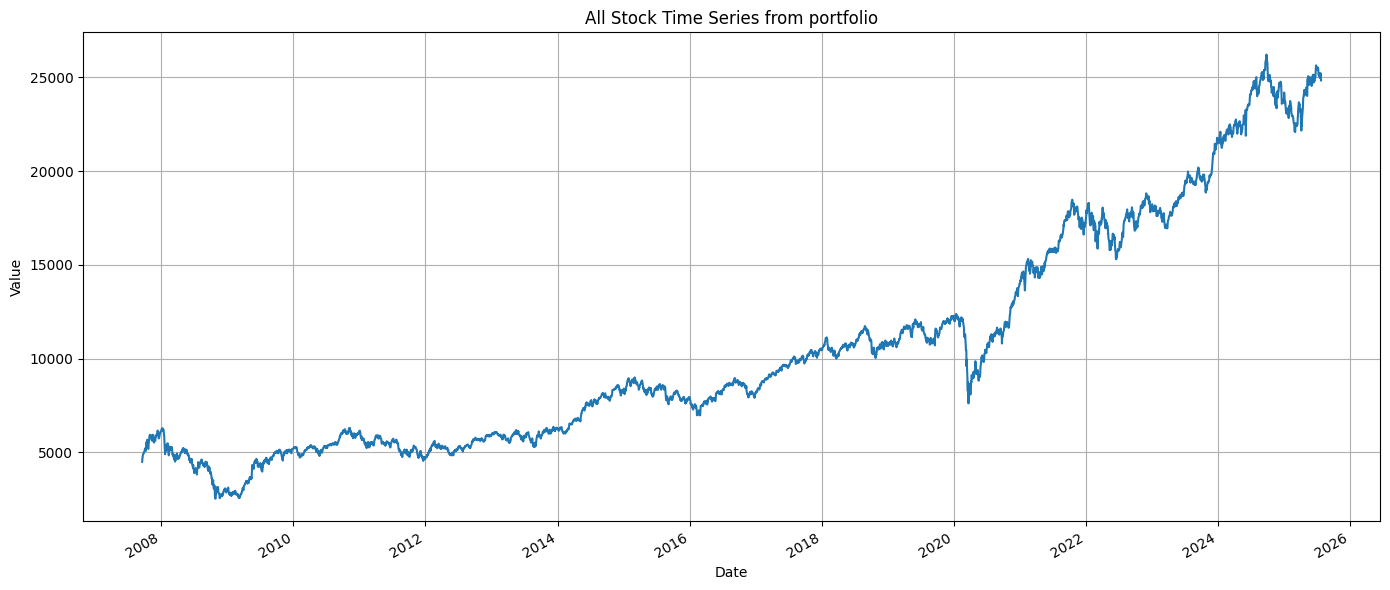

/tmp/ipython-input-564783967.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dist_label = (f"t-Fit\nμ={float(loc_t*self.trading_days):.4f}, σ={float(std*np.sqrt(self.trading_days)):.4f}, "f"df={float(df_t):.2f}\nKS={float(ks):.4f}")


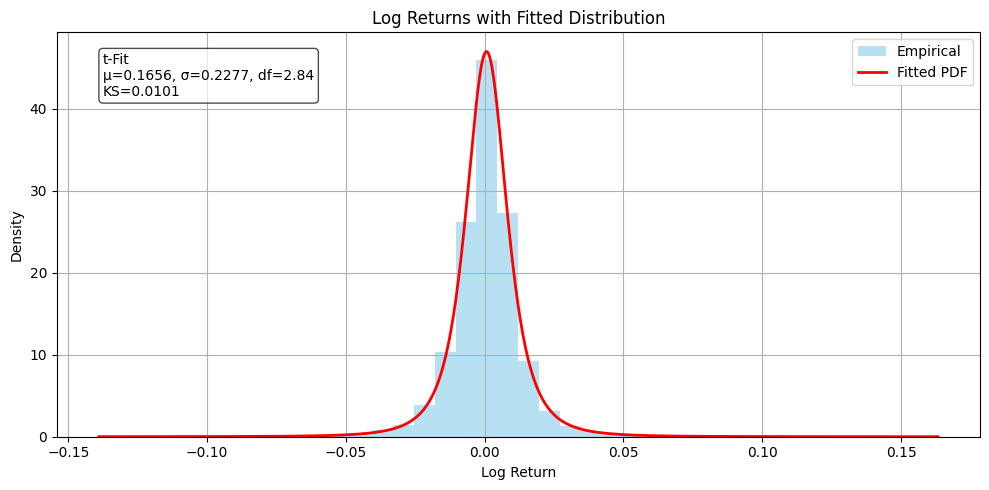

    Index Column Name
0       0    ADANIENT
1       1  ADANIPORTS
2       2  APOLLOHOSP
3       3  ASIANPAINT
4       4    AXISBANK
5       5  BAJAJ-AUTO
6       6  BAJAJFINSV
7       7  BAJFINANCE
8       8         BEL
9       9  BHARTIARTL
10     10       CIPLA
11     11   COALINDIA
12     12     DRREDDY
13     13   EICHERMOT
14     14      GRASIM
15     15     HCLTECH
16     16    HDFCBANK
17     17    HDFCLIFE
18     18  HEROMOTOCO
19     19    HINDALCO
20     20  HINDUNILVR
21     21   ICICIBANK
22     22  INDUSINDBK
23     23        INFY
24     24         ITC
25     25      JIOFIN
26     26    JSWSTEEL
27     27   KOTAKBANK
28     28          LT
29     29         M&M
30     30      MARUTI
31     31   NESTLEIND
32     32        NTPC
33     33        ONGC
34     34   POWERGRID
35     35    RELIANCE
36     36     SBILIFE
37     37        SBIN
38     38  SHRIRAMFIN
39     39   SUNPHARMA
40     40  TATACONSUM
41     41  TATAMOTORS
42     42   TATASTEEL
43     43         TCS
44     44 

In [42]:
#%run noise_types.ipynb
%run export_data_sql.ipynb
%run fitting_params.ipynb
%run factor_models.ipynb
%run efficient_frontier.ipynb
%run black_litterman.ipynb
%run portfolio_data_opt.ipynb

rfr = 0.05 # risk free rate
dist = 't' #option available = 'norm' , 't'
index_name = 'nifty50' #options available = 'nifty50, niftynext50'

PD = PortfolioData (rfr, dist, index_name)
asset_names = PD.get_data_index()
print (asset_names)

# LOG RETURN of portfolio: mu, sigma, (or df) from multivariate fitting

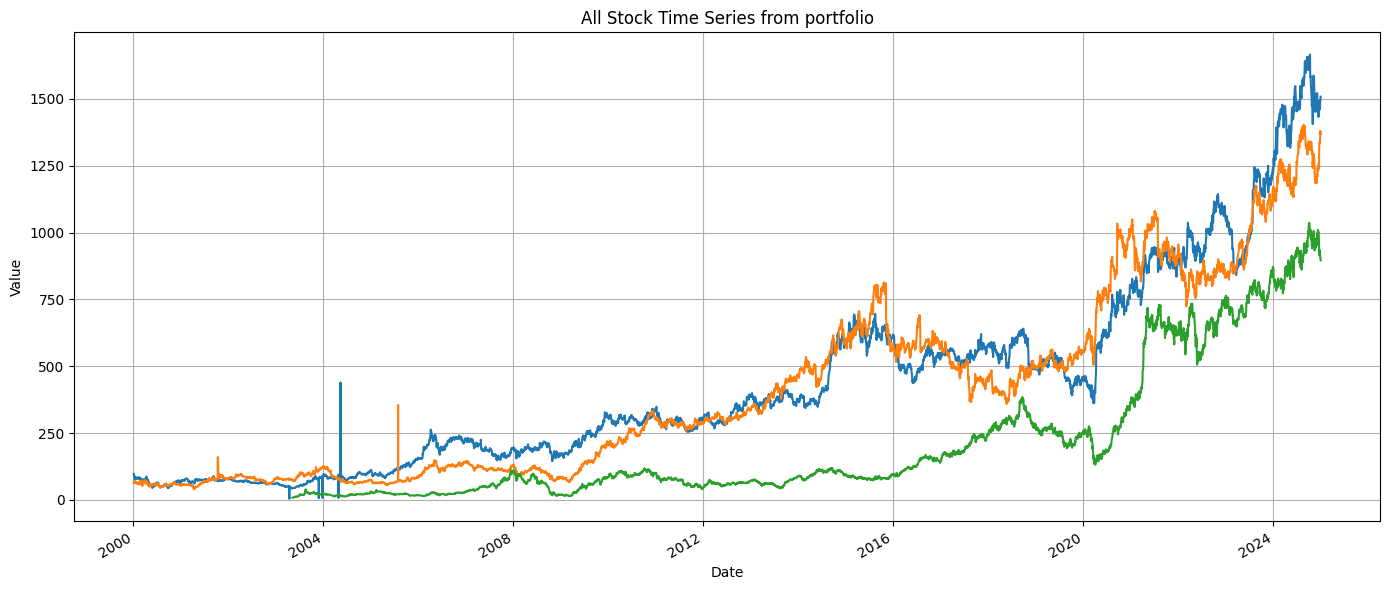

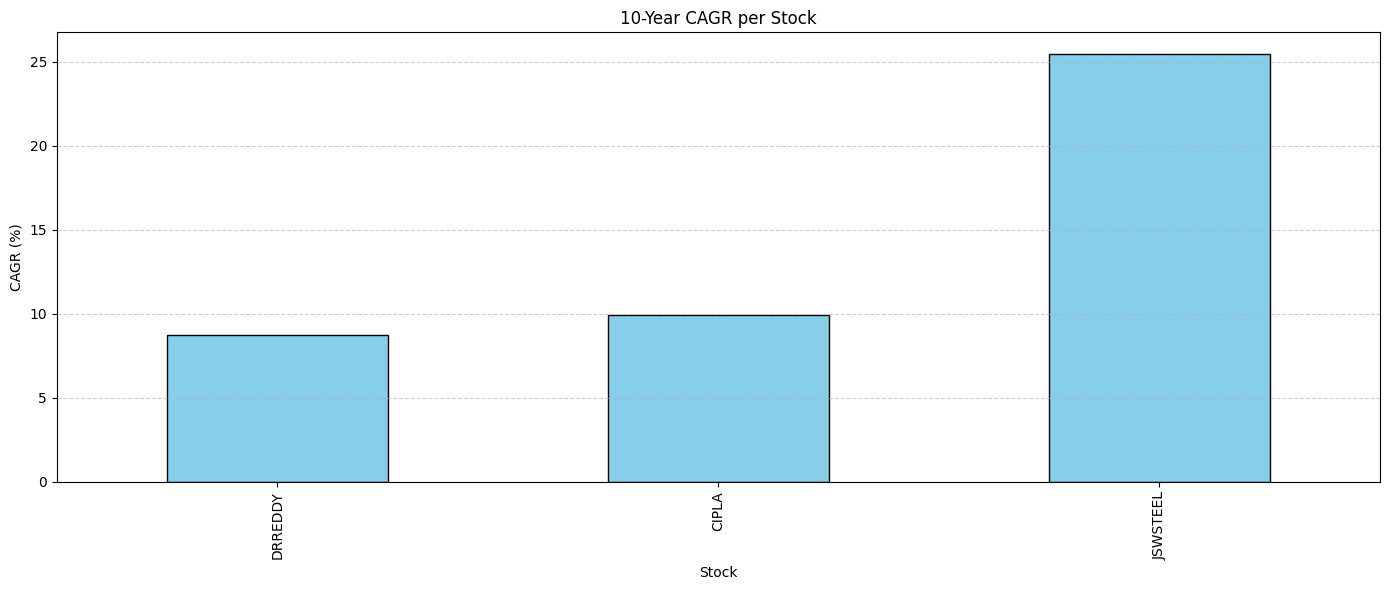

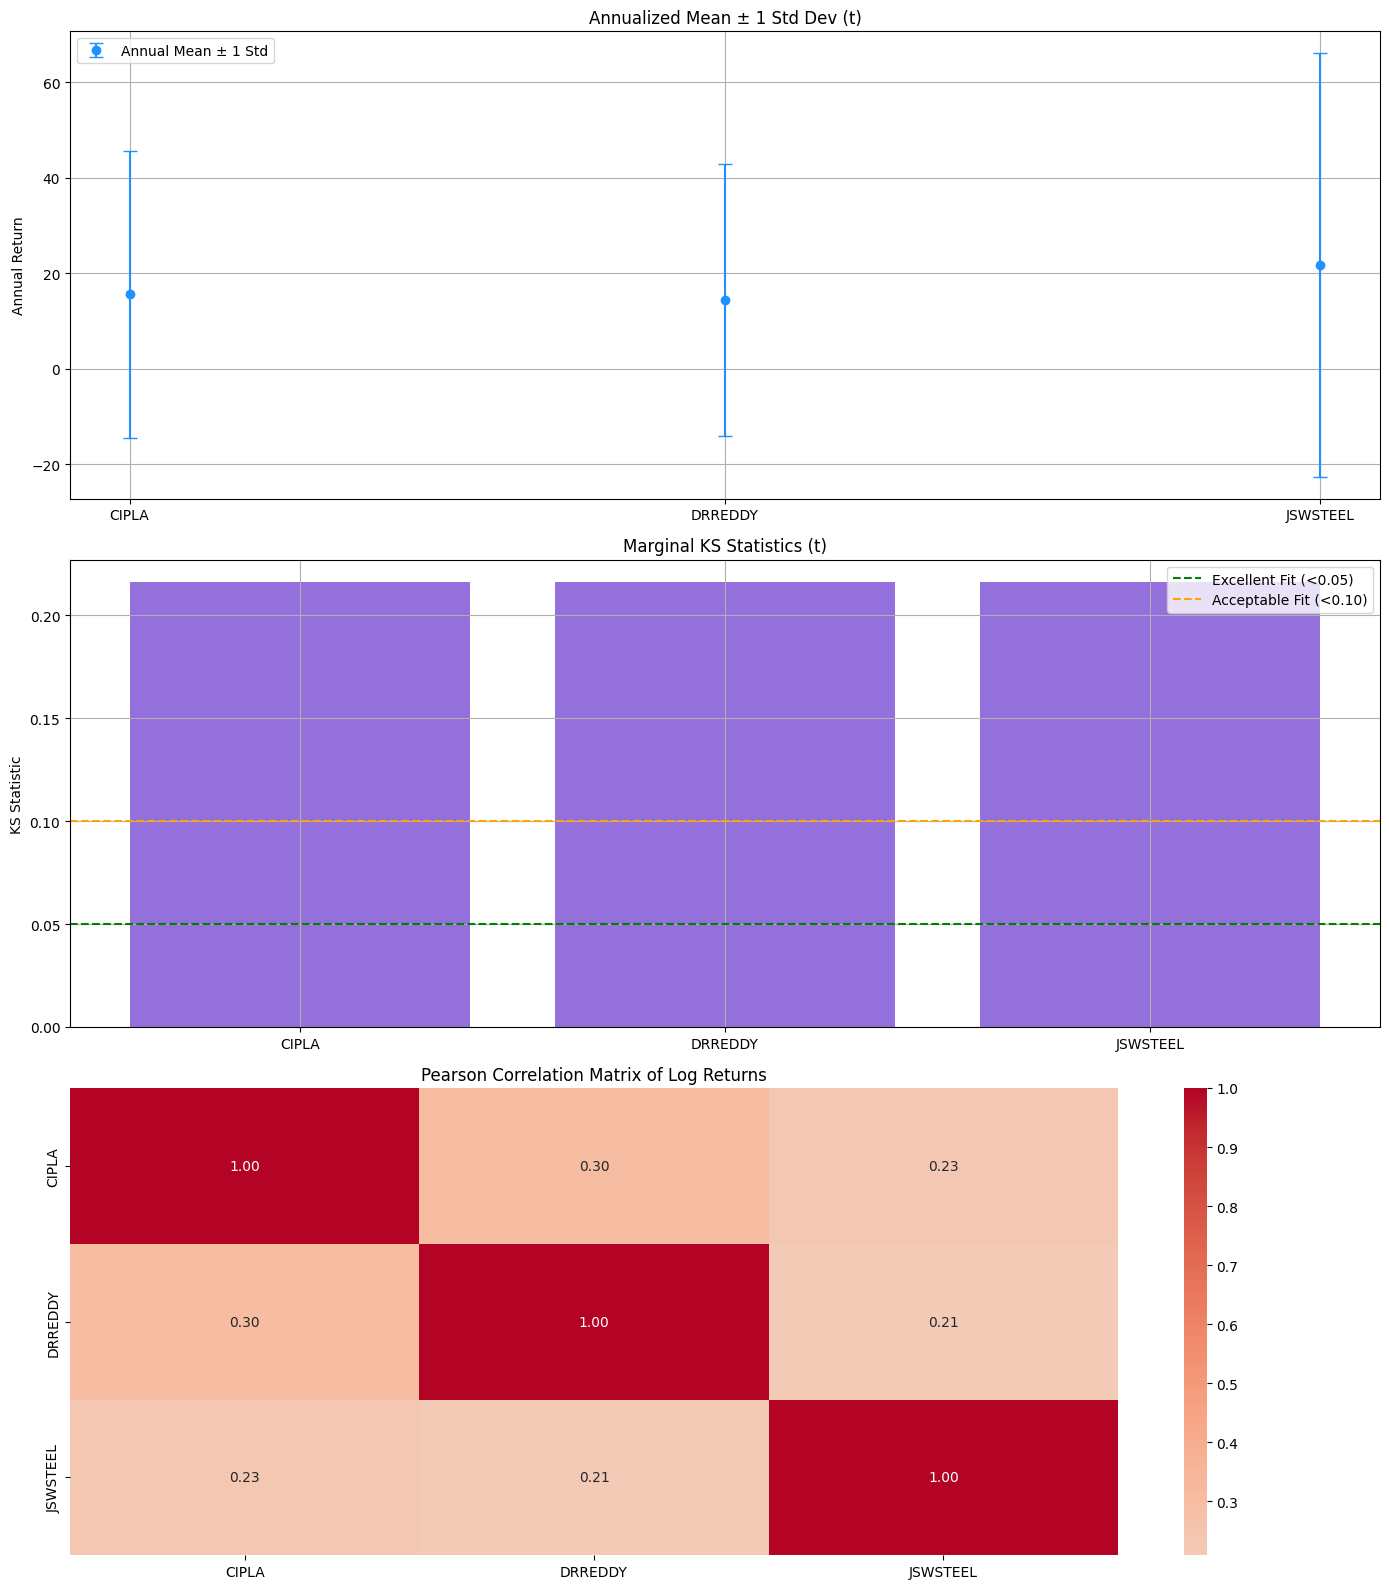

In [43]:
#customize portfolio of the chosen index from the output above
col = [10 , 12, 26]
PD.logreturn_portfolio(col)

# PORTFOLIO OPTIMIZATION (Lagrange): RISK FREE + N RISKY ASSESTS

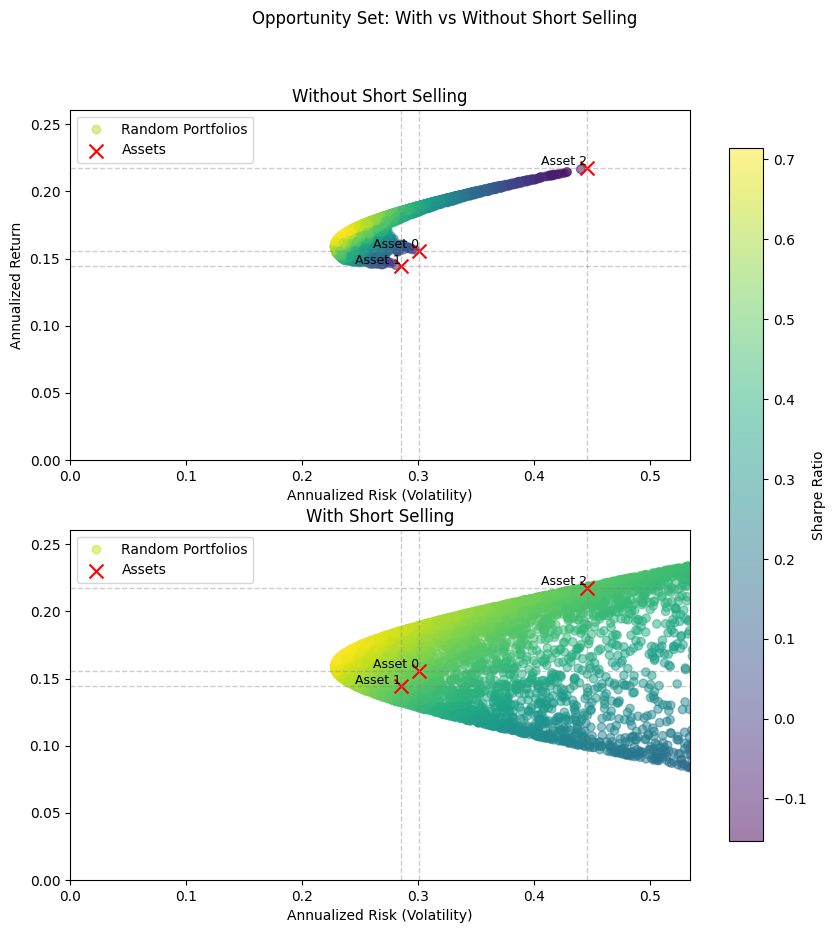

Efficient Frontier Computed.
from 100% risky portfolio on CML [0.35760363 0.34662661 0.30387629]


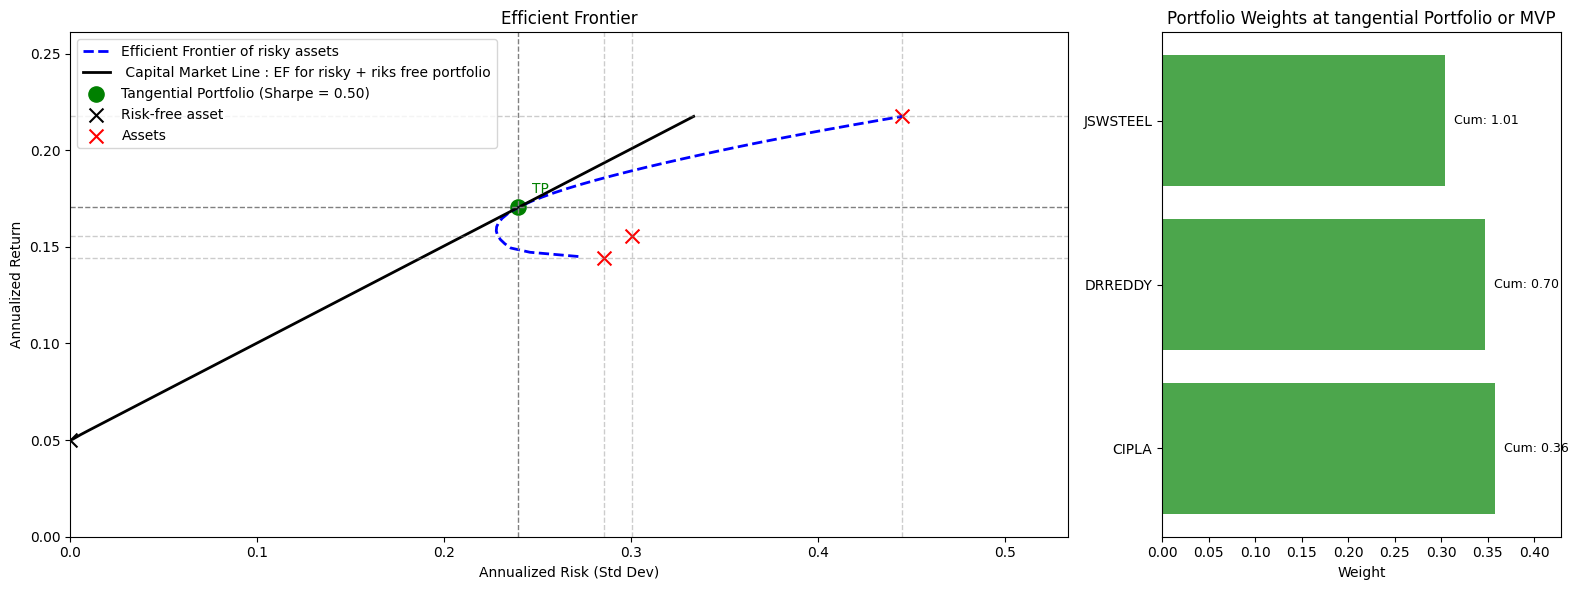

In [44]:
PD.MPT('cml') # option available = 'minvar' , 'maxret' , 'cml'

# FACTOR MODELS - param estimation from overall index/market

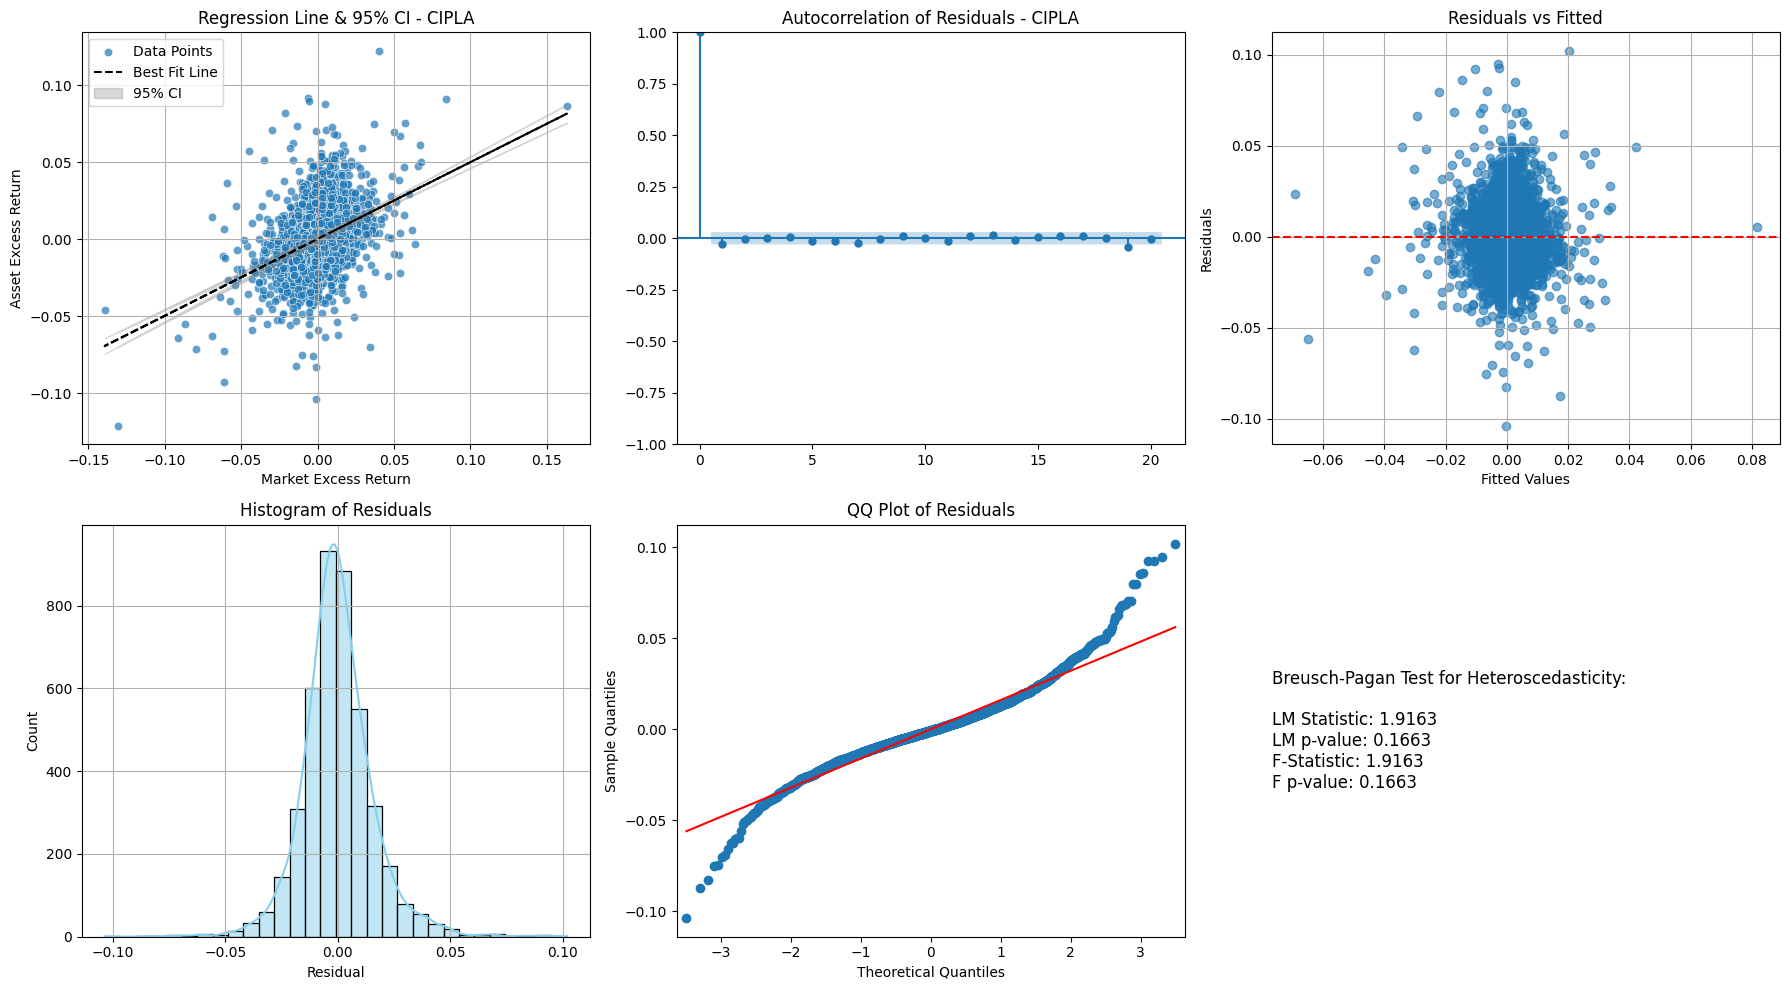

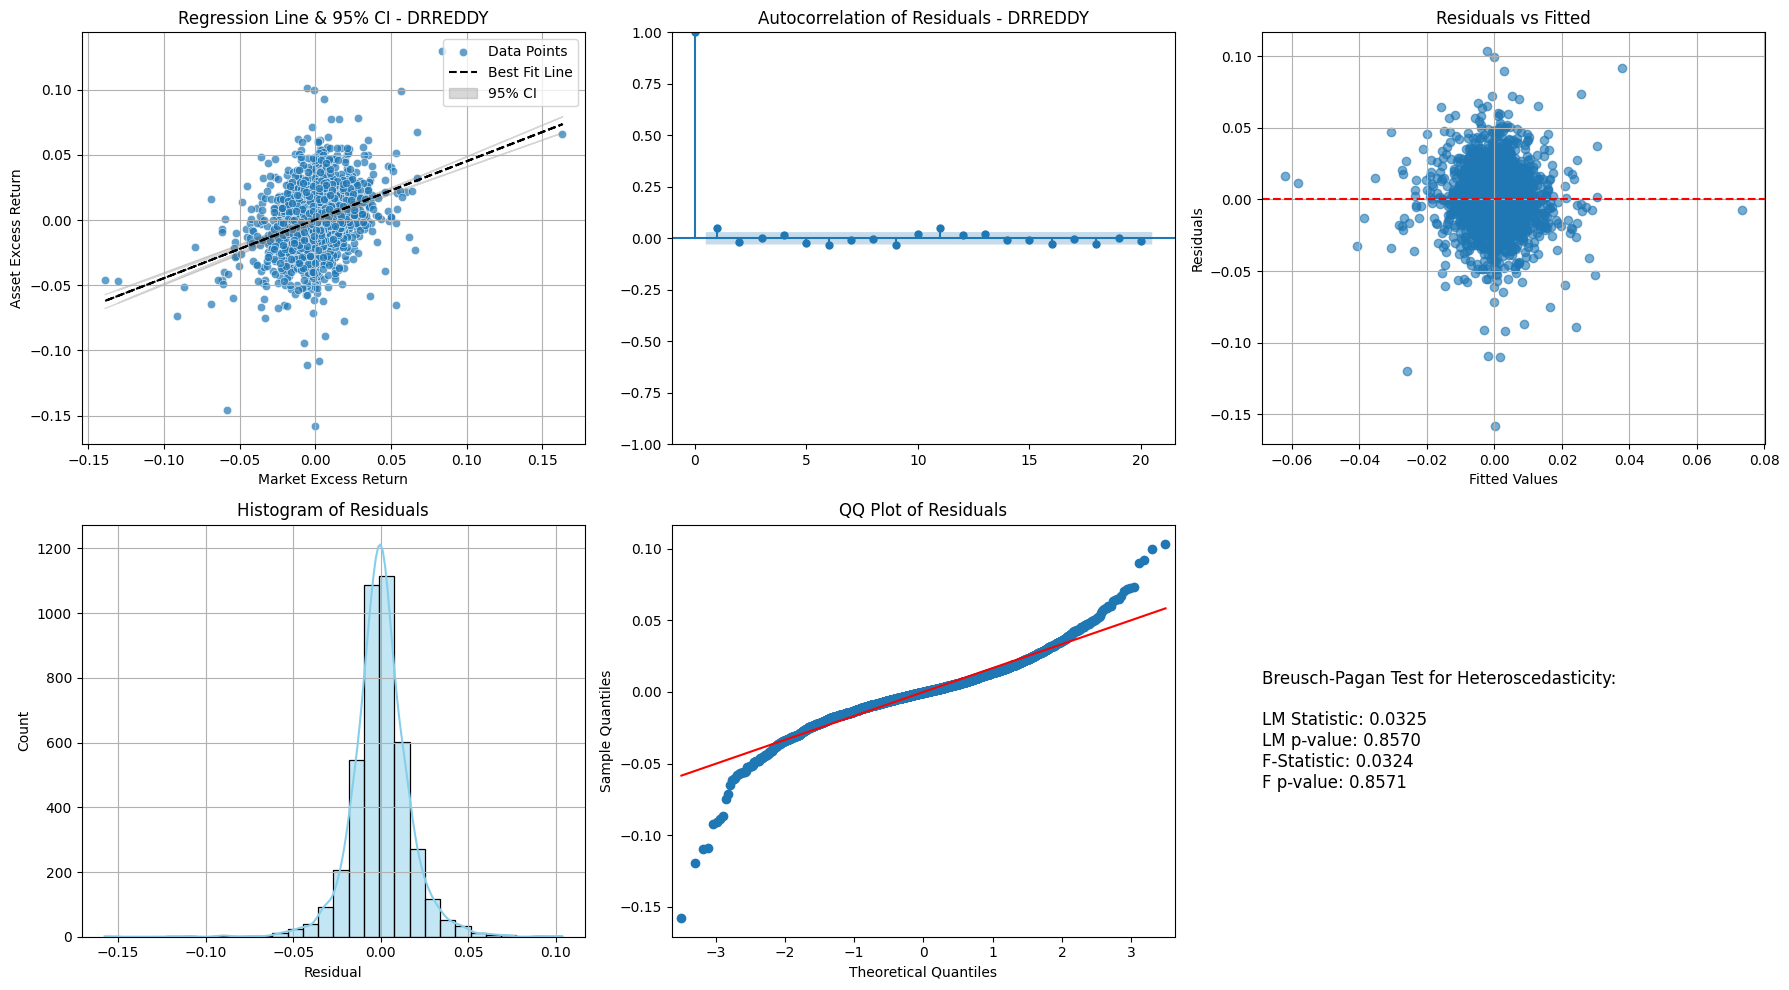

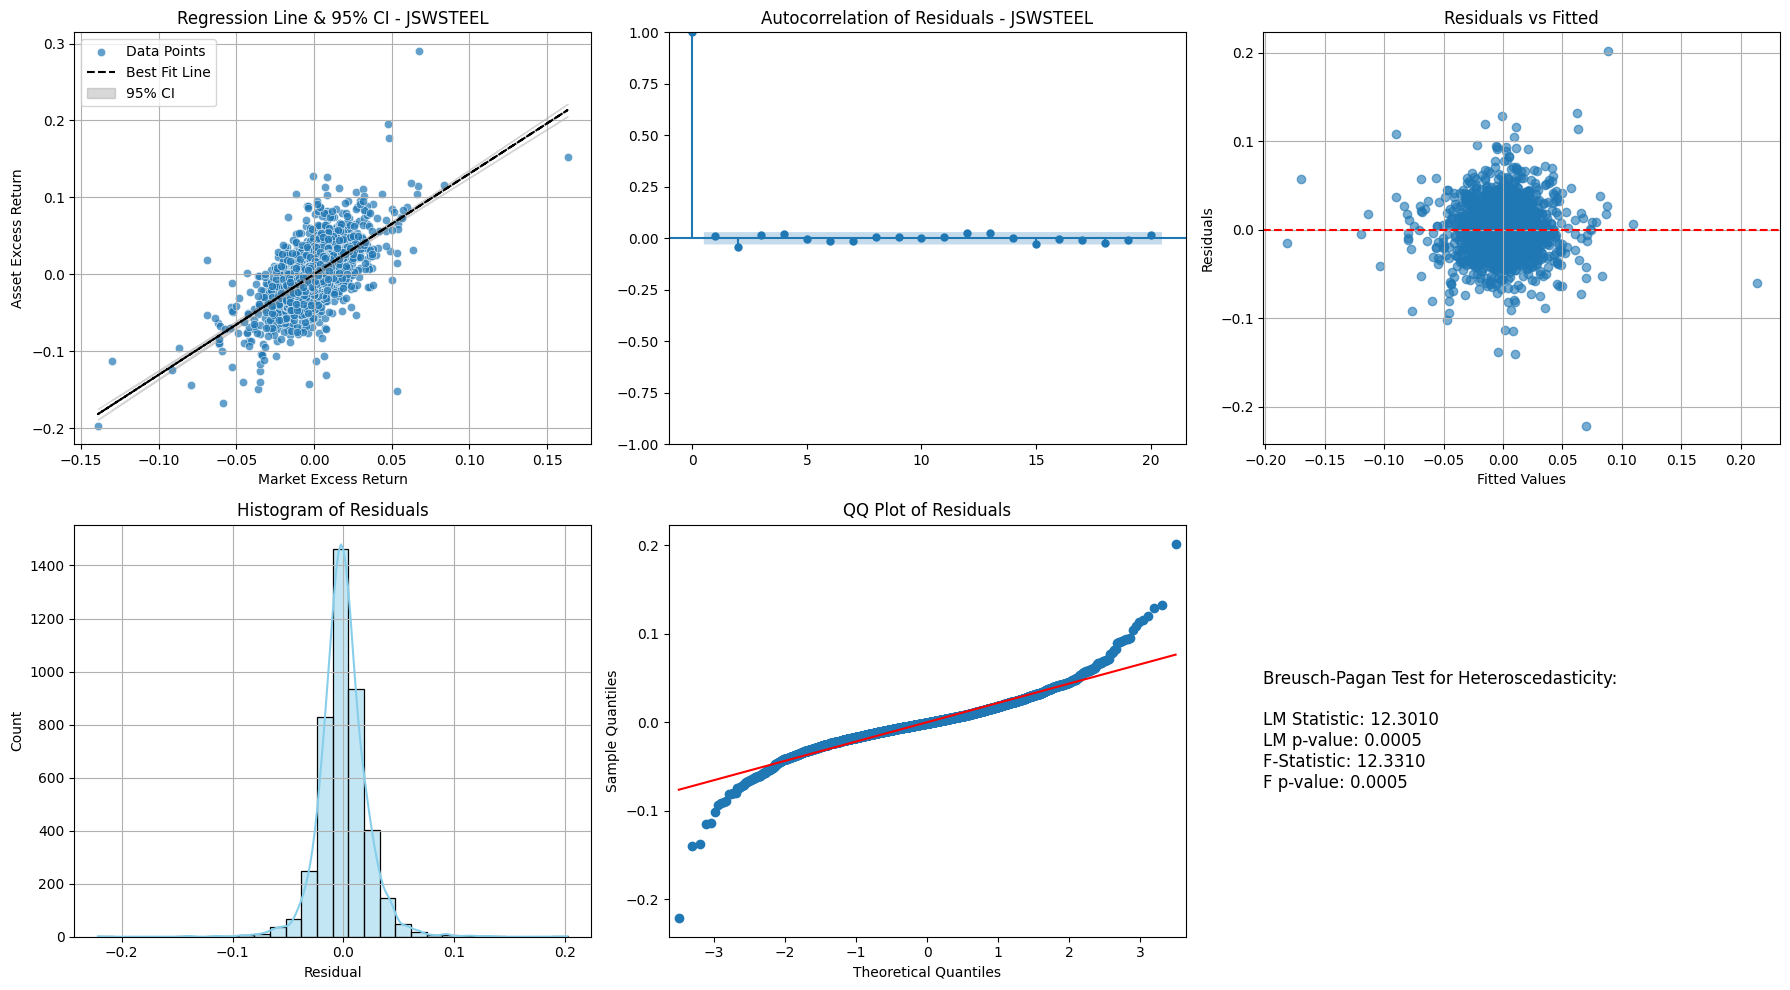

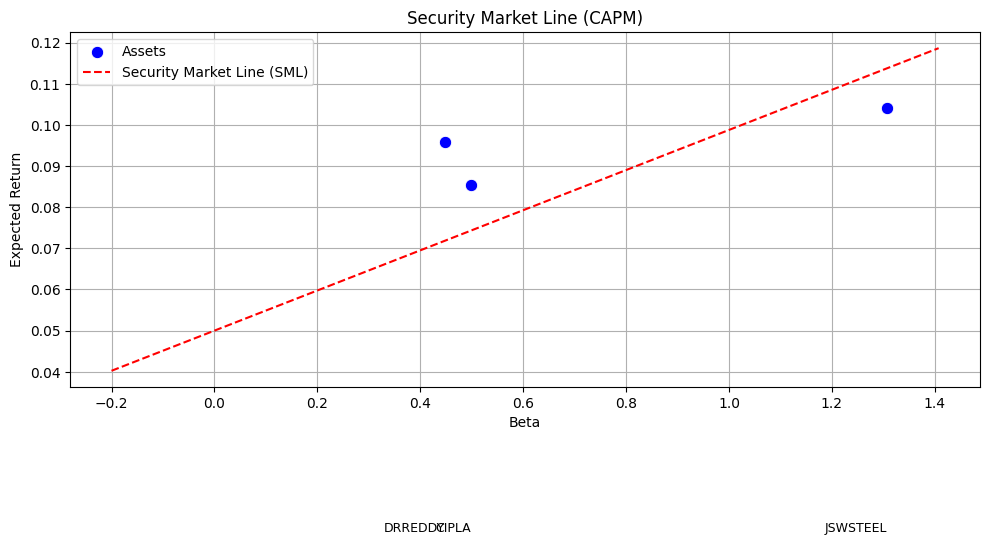

             alpha  alpha_ci_lower  alpha_ci_upper  alpha_pval      beta  \
CIPLA     0.000242       -0.000240        0.000725    0.324951  0.499180   
DRREDDY   0.000294       -0.000209        0.000796    0.252445  0.448380   
JSWSTEEL  0.000160       -0.000498        0.000819    0.632863  1.307554   

          beta_ci_lower  beta_ci_upper      beta_pval        R2    Adj_R2  
CIPLA          0.462917       0.535443  3.730920e-148  0.146770  0.146568  
DRREDDY        0.410609       0.486151  7.552356e-113  0.113421  0.113212  
JSWSTEEL       1.258105       1.357002   0.000000e+00  0.388291  0.388146  


In [45]:
print (PD.Factor('CAPM') )
# options available = 'Sharpe', 'CAPM' ,

# Black-Litterman

In [46]:
# Define views
P = [
     [1, -1, 0],      # Asset 1 will outperform Asset 2 by
     [0, 0, 1]        # Asset 3 will rise by
     ]
Q = [0.02, 0.01]           # By 2% and 1%

C = [0.25, 0.60, 0.75]  #Confidence in the views

PD.black_litterman(col, P, Q , C = None)

std of the market return 0.525622749963911
risk aversion:  0.22376055291454355
Prior expected market return [0.15430435 0.02368584 0.02669946]
Prior variance market return [[0.13704966 0.00191256 0.00155694]
 [0.00191256 0.01997398 0.00177723]
 [0.00155694 0.00177723 0.01241571]]
tau:  0.05754738524777346
Posterior Returns:
 [0.1043981  0.02901442 0.01838955]
Posterior Covariance Matrix:
 [[2.45884664 0.04299564 0.027882  ]
 [0.04299564 0.36587157 0.03176496]
 [0.027882   0.03176496 0.22195546]]
Optimal Weights:
 [0.18780639 0.32798276 0.31042714]
